Introduction to Sentence Transformers

<sup>This notebook is a part of Natural Language Processing class at the University of Ljubljana, Faculty for computer and information science. Please contact [boshko.koloski@ijs.si](mailto:boshko.koloski@ijs.si) for any comments.</sub>

---

Sentence Transformers extend the concept of word embeddings, such as those generated by models like BERT or RoBERTa, to produce embeddings for entire sentences or paragraphs. These embeddings capture the semantic essence of the text, making them highly effective for a range of Natural Language Processing (NLP) tasks that require understanding the meaning of full sentences. Unlike traditional models that process each word individually, Sentence Transformers apply a pooling strategy over the word embeddings to generate a single, fixed-size sentence embedding.

**Why Sentence Embeddings?**

Traditional word embeddings provide a dense vector representation for individual words. However, when dealing with sentences, it becomes crucial to encapsulate the contextual relationship between words in a unified manner. Sentence embeddings address this need by offering a holistic representation of sentences, thereby enabling better performance on tasks like semantic search, similarity comparison, and clustering.

**Generating Sentence Embeddings**

A sentence $S$ composed of words $\{w_1, w_2, \ldots, w_n\}$ is transformed into an embedding $\vec{s} \in \mathbb{R}^d$ through a transformer model $T$, followed by a pooling operation $P$:

$$
\vec{s} = P\left( T(w_1), T(w_2), \ldots, T(w_n) \right)
$$

**Siamese and Triplet Networks**

Sentence Transformers leverage Siamese and Triplet network architectures for training. These architectures are designed to understand the similarity between texts.

- **Siamese Networks** train on pairs of sentences, learning to bring the embeddings of similar sentences closer and push apart the embeddings of dissimilar sentences.

- **Triplet Networks** extend this concept by working with triplets: an anchor sentence, a positive sentence (similar to the anchor), and a negative sentence (dissimilar to the anchor). The model learns to differentiate the anchor from the negative by a greater margin than from the positive.

**Loss Functions**

Training involves minimizing a loss function that measures the discrepancy between the model's current output and the desired output. For sentence similarity tasks, contrastive loss or triplet loss functions are commonly used:

- **Contrastive Loss** for a pair of sentences $S_1$ and $S_2$ with embeddings $\vec{s_1}$ and $\vec{s_2}$ is defined as:

$$
L(\vec{s_1}, \vec{s_2}, y) = y \cdot \|\vec{s_1} - \vec{s_2}\|^2 + (1 - y) \cdot \max(0, m - \|\vec{s_1} - \vec{s_2}\|)^2
$$

where $y = 1$ if $S_1$ and $S_2$ are similar, $y = 0$ if they are dissimilar, and $m$ is a margin that is enforced between dissimilar pairs.

- **Triplet Loss** for an anchor sentence $A$, a positive sentence $P$, and a negative sentence $N$ is given by:

$$
L(A, P, N) = \max\left(0, \|\vec{a} - \vec{p}\|^2 - \|\vec{a} - \vec{n}\|^2 + m\right)
$$

where $\vec{a}$, $\vec{p}$, and $\vec{n}$ are the embeddings for the anchor, positive, and negative sentences, respectively, and $m$ is a margin enforced between positive and negative pairs.

**Applications of Sentence Transformers**

The embeddings produced by Sentence Transformers can be directly used for a variety of applications, including:

- Semantic Textual Similarity: Measuring the similarity between texts.
- Information Retrieval: Enhancing search functionalities by finding semantically relevant documents.
- Text Clustering: Grouping texts into clusters based on their semantic similarity.
- Classification: Facilitating sentence-level classification tasks by using embeddings as input features.

**Conclusion**

Sentence Transformers represent a significant advancement in the field of NLP, providing powerful tools for handling complex tasks involving sentence-level semantics. By leveraging the strengths of transformer models and specialized training architectures, Sentence Transformers offer efficient and effective solutions for a wide array of NLP challenges.


In [ ]:
!pip install sentence-transformers scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


### Load the `20 newsgroup`` dataset


In [3]:
data = fetch_20newsgroups(subset='all', categories=None, remove=('headers', 'footers', 'quotes'))
texts = data['data'][:2000]  # Limiting to the first 2000 documents for brevity
print(texts[0])




I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




### Encode the texts

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 63/63 [00:48<00:00,  1.31it/s]


### Perform KMeans clustering



In [5]:
num_clusters = 20  # As we have 20 newsgroups
clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_


### Reduce dimensionality for visualization


In [6]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

### Plotting the reduced PCA


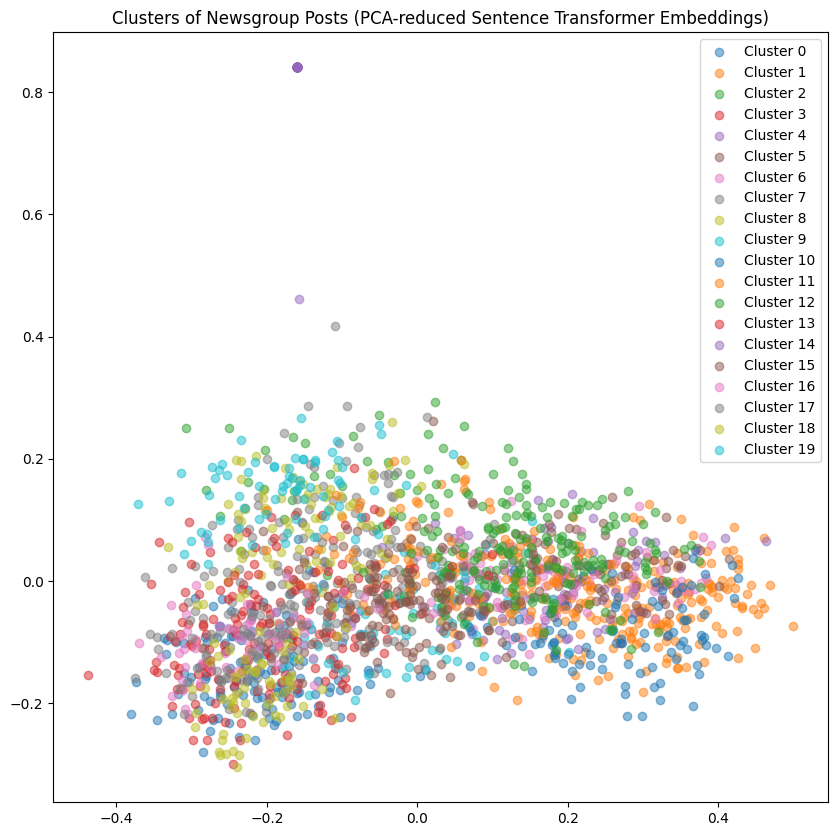

In [7]:
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    idxs = np.where(cluster_assignment == i)[0]
    plt.scatter(embeddings_2d[idxs, 0], embeddings_2d[idxs, 1], label=f'Cluster {i}', alpha=0.5)
plt.title('Clusters of Newsgroup Posts (PCA-reduced Sentence Transformer Embeddings)')
plt.legend()
plt.show()

##  KeyBERT - KeyWord extraction via BERT

First, document embeddings are extracted with BERT to get a document-level representation. Then, word embeddings are extracted for N-gram words/phrases. Finally, cosine similarity is used to find the words/phrases that are the most similar to the document. The most similar words could then be identified as the words that best describe the entire document.



In [8]:
!pip install keybert --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
from keybert import KeyBERT

doc = texts[0]
kw_model = KeyBERT(model='all-MiniLM-L6-v2')
keywords = kw_model.extract_keywords(doc)

In [10]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None)

[('pens', 0.4717),
 ('islanders', 0.4596),
 ('jagr', 0.4259),
 ('bowman', 0.4052),
 ('pittsburghers', 0.3388)]

In [11]:
 kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), stop_words=None)

[('pens fans', 0.6066),
 ('islanders lose', 0.529),
 ('game pens', 0.5033),
 ('pens rule', 0.4849),
 ('the pens', 0.4808)]

In [12]:
texts = np.array(texts)

In [13]:
for i in range(num_clusters):
    idxs = np.where(cluster_assignment == i)[0]

    joint_documents = " ".join(texts[idxs])
    keywords = kw_model.extract_keywords(joint_documents,use_mmr=True, diversity=0.7)
    print(i, keywords)

0 [('christians', 0.3681), ('_the_users_guide_to_invisible_', 0.1337), ('yaldrini', 0.067), ('mmmmm', 0.0646), ('v22964qs', 0.0077)]
1 [('vga', 0.3938), ('milliseconds', 0.3328), ('advises', 0.0478), ('68881', -0.0085), ('start_x_clients_script', -0.0544)]
2 [('sportschannel', 0.5028), ('blanketing', 0.1227), ('agree', 0.0855), ('average', 0.0579), ('anglais', 0.0255)]
3 [('constitution', 0.4121), ('misinterpretation', 0.2262), ('citations', 0.1278), ('bobbe', 0.0316), ('shielding', 0.0036)]
4 [('os2', 0.3872), ('laserwriter', 0.2303), ('batchfile', 0.0519), ('worth', 0.0456), ('pennsylvania', -0.095)]
5 [('real3d', 0.6021), ('amigajpegv4', 0.3705), ('programmatically', 0.1843), ('sloppiness', 0.0048), ('incorporate', 0.0039)]
6 [('xcreatewindow', 0.4474), ('icccm', 0.3913), ('quickeys', 0.1963), ('dos_has_locale', 0.0282), ('override_redirect', -0.0445)]
7 [('heliocentric', 0.4464), ('zeno', 0.2958), ('biopsy', 0.1297), ('unlimited', 0.0582), ('integration', 0.0453)]
8 [('pitching', 0

### BERTopic
Topic modeling is the process of automatically identifying topics present in a text corpus. BERTopic is an algorithm designed for extracting topics from large volumes of text. It leverages transformer-based models to create dense vector representations of documents, facilitating the identification of semantically coherent topics. The process involves several key steps, from embedding documents to clustering and refining topics for clear, thematic insights.

**Algorithm Steps:**

1. **Document Embedding**: Each document $D$ is transformed into a high-dimensional vector $\vec{d} \in \mathbb{R}^n$ using a transformer model. This embedding encapsulates the semantic essence of the document.
   
   $ \text{Embed}(D) = \vec{d}$

2. **Dimensionality Reduction**: To enhance clustering efficiency, BERTopic employs dimensionality reduction, typically through UMAP, reducing each vector to a lower-dimensional space $\vec{d'} \in \mathbb{R}^m$, where $m < n$.

   $$ \text{Reduce}(\vec{d}) = \vec{d'} $$

3. **Clustering**: Documents are then clustered based on their reduced embeddings using a density-based algorithm like HDBSCAN. Each cluster $C_i$ represents documents that share thematic content.

   $$ \text{Cluster}(\vec{d'}) = \{C_1, C_2, \ldots, C_k\} $$

4. **Topic Creation**: BERTopic identifies representative words or phrases for each cluster \(C_i\), defining the core theme or topics by analyzing term frequencies and their distributions across the corpus.

  $$ \text{Topic}_i = \text{TopWords}(C_i)$$

5. **Refinement**: The algorithm refines topics by merging closely related ones and reassigning documents based on topic probabilities, improving topic coherence and distinction.

  $$ \text{RefineTopics}(\{C_1, C_2, \ldots, C_k\}) = \{T_1, T_2, \ldots, T_j\} $$

**Integration with Sentence Transformers:**

BERTopic enhances its capabilities by incorporating embeddings from Sentence Transformers. This integration allows for the capture of more nuanced semantic relationships between documents, facilitating the discovery of more coherent and detailed topics.

1. **Sentence Embedding with Sentence Transformers**: Documents $D$ are represented as an aggregation of Sentence Transformer embeddings of their constituent sentences, forming a comprehensive document vector $\vec{d}$.

   $$ \vec{d} = \text{Aggregate}(\vec{s}_1, \vec{s}_2, \ldots, \vec{s}_n) $$

2. **Semantic Clustering**: Leveraging Sentence Transformer embeddings enables BERTopic to perform semantic clustering, identifying topics with greater semantic richness and coherence.

3. **Hierarchical Topic Modeling**: The deep semantic understanding provided by Sentence Transformer embeddings allows BERTopic to explore hierarchical topic structures,

4. **Topic Extraction**: Once documents are clustered, BERTopic identifies representative keywords or phrases for each cluster, effectively summarizing the main themes or topics of the grouped documents. This is where the high-quality embeddings play a vital role, as they ensure that the extracted topics genuinely reflect the underlying subjects discussed in the text corpus.

5. **Dynamic and Scalable**: BERTopic is dynamic and scalable, capable of handling datasets ranging from small collections of documents to large-scale text corpora. The use of Sentence Transformers ensures that the computational cost is manageable while maintaining high-quality topic detection.

In [14]:
!pip install bertopic datasets  --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [15]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from umap import UMAP
from datasets import load_dataset


### We will use the ``ML-ArXiV-Papers`` dataset

In [16]:

dataset = load_dataset("CShorten/ML-ArXiv-Papers")["train"]

# Extract abstracts to train on and corresponding titles
abstracts = dataset["abstract"][:10000]
titles = dataset["title"][:10000]


Generating train split: 100%|██████████| 117592/117592 [00:00<00:00, 136022.94 examples/s]


### We will use the ``all-miniLM-L6-v2`` sentence-transformer for document representation.

In [ ]:
# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)


Batches:  84%|████████▍ | 263/313 [04:36<00:38,  1.30it/s]

### We use bi-gram count vectorizer for topic representation with exclusion of stopwords

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

### We use ```UMAP``` for dimensionality reduction

In [ ]:
umap_model = UMAP(n_neighbors=20, n_components=5, min_dist=0.0, metric='cosine', random_state=42)


### We use ```HDBScan``` for document clustering

In [ ]:
hdbscan_model = HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  # Hyperparameters
  top_n_words=10,
  verbose=True,
  calculate_probabilities=True
)

In [ ]:
topics, probabilities  = topic_model.fit_transform(abstracts, embeddings)

2024-04-02 06:10:06,797 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-02 06:10:56,919 - BERTopic - Dimensionality - Completed ✓
2024-04-02 06:10:56,921 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-02 06:11:01,207 - BERTopic - Cluster - Completed ✓
2024-04-02 06:11:01,222 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-02 06:11:05,544 - BERTopic - Representation - Completed ✓


### Display the topics


In [ ]:
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,3052,-1_data_learning_algorithm_model,"[data, learning, algorithm, model, method, pro...",[ Latent variable models are a fundamental mo...
1,0,650,0_word_neural_speech_language,"[word, neural, speech, language, recurrent, mo...",[ In real-time speech recognition application...
2,1,494,1_policy_reinforcement_reinforcement learning_...,"[policy, reinforcement, reinforcement learning...",[ In recent years there have been many succes...
3,2,269,2_networks_deep_neural_neural networks,"[networks, deep, neural, neural networks, netw...","[ In the last few years, deep learning has le..."
4,3,225,3_matrix_rank_low rank_low,"[matrix, rank, low rank, low, pca, matrix comp...",[ Matrix Completion is the problem of recover...
...,...,...,...,...,...
76,75,25,75_students_student_grading_peer,"[students, student, grading, peer, questions, ...","[ In massive open online courses (MOOCs), pee..."
77,76,24,76_neurons_spiking_synaptic_spike,"[neurons, spiking, synaptic, spike, neuronal, ...",[ We train spiking deep networks using leaky ...
78,77,24,77_traffic_travel_road_mobility,"[traffic, travel, road, mobility, map matching...",[ Map matching of the GPS trajectory serves t...
79,78,22,78_sgd_svrg_asynchronous_stochastic,"[sgd, svrg, asynchronous, stochastic, parallel...",[ One of the major issues in stochastic gradi...


### Visualize topic

In [ ]:
topic_model.visualize_topics()


### Topic distribution

In [ ]:
topic_model.visualize_distribution(probabilities[0], min_probability=0.0)

### Hirearchy of topics

In [ ]:
topic_model.visualize_hierarchy()
